### INTRO

Notebook https://www.kaggle.com/code/siddhvr/enefit-pebop-eda-plotly-and-modelling/notebook

Basic Submission Demo: https://www.kaggle.com/code/sohier/enefit-basic-submission-demo/notebook

Overview: https://www.kaggle.com/competitions/predict-energy-behavior-of-prosumers/overview

Dataset Description
Your challenge in this competition is to predict the amount of electricity produced and consumed by Estonian energy customers who have installed solar panels. 
You'll have access to:
- weather data
- relevant energy prices, 
- records of the installed photovoltaic capacity.

💡 Nota bene:
All datasets follow the same time convention. 
- Time is given in EET/EEST. Most of the variables are a sum or an average over a period of 1 hour. 
- The datetime column (whatever its name) always gives the START of the 1-hour period. 
- However, for the weather datasets, some variables such as temperature or cloud cover, are given for a specific time, which is always the END of the 1-hour period.

TRAIN.csv
- county - An ID code for the county.
- is_business - Boolean for whether or not the prosumer is a business.
- product_type - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.
- TARGET - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.
- is_consumption - Boolean for whether or not this row's target is consumption or production.
- datetime - The Estonian time in EET (UTC+2) / EEST (UTC+3). It describes the START of the 1-hour period on which target is given.
- data_block_id - All rows sharing the same data_block_id will be available at the SAME FORECAST TIME. This is a function of what information is available when forecasts are actually made, at 11 AM EACH MORNING. For example, if the forecast weather data_block_id for predictins made on October 31st is 100 then the historic weather data_block_id for October 31st will be 101 as the historic weather data is only actually available the next day.
- row_id - A unique identifier for the row.
- prediction_unit_id - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.


FORECAST_WEATHER.csv (records: 3.424512, 18 columns)

Weather forecasts that would have been available at prediction time. Sourced from the European Centre for Medium-Range Weather Forecasts.

min: 2021-09-01 02:00:00 
max: 2023-05-30 02:00:00

112 GPS areas, each with 1 prediction per hour, each 1,2,3,4...48 hours ahead
records per hour: 112 x 48 (hours ahead) = 5376
records per 24h day: 112 x 24 x 48 = 129.024
637 data_block_id's

- [latitude/longitude] - The coordinates of the weather forecast.
- origin_datetime - The timestamp of when the forecast was generated.
- hours_ahead - The number of hours between the forecast generation and the forecast weather. Each forecast covers 48 hours in total.
- temperature - The air temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- dewpoint - The dew point temperature at 2 meters above ground in degrees Celsius. Estimated for the end of the 1-hour period.
- cloudcover_[low/mid/high/total] - The percentage of the sky covered by clouds in the following altitude bands: 0-2 km, 2-6, 6+, and total. Estimated for the end of the 1-hour period.
- 10_metre_[u/v]_wind_component - The [eastward/northward] component of wind speed measured 10 meters above surface in meters per second. Estimated for the end of the 1-hour period.
- data_block_id
- forecast_datetime - The timestamp of the predicted weather. Generated from origin_datetime plus hours_ahead. This represents the start of the 1-hour period for which weather data are forecasted.
- direct_solar_radiation - The direct solar radiation reaching the surface on a plane perpendicular to the direction of the Sun accumulated during the hour, in watt-hours per square meter.
- surface_solar_radiation_downwards - The solar radiation, both direct and diffuse, that reaches a horizontal plane at the surface of the Earth, accumulated during the hour, in watt-hours per square meter.
- snowfall - Snowfall over hour in units of meters of water equivalent.
- total_precipitation - The accumulated liquid, comprising rain and snow that falls on Earth's surface over the described hour, in units of meters.

HISTORICAL_WEATHER.csv Historic weather data.

- datetime - This represents the start of the 1-hour period for which weather data are measured.
- temperature - Measured at the end of the 1-hour period.
- dewpoint - Measured at the end of the 1-hour period.
- rain - Different from the forecast conventions. The rain from large scale weather systems of the hour in millimeters.
- snowfall - Different from the forecast conventions. Snowfall over the hour in centimeters.
- surface_pressure - The air pressure at surface in hectopascals.
- cloudcover_[low/mid/high/total] - Different from the forecast conventions. Cloud cover at 0-3 km, 3-8, 8+, and total.
- windspeed_10m - Different from the forecast conventions. The wind speed at 10 meters above ground in meters per second.
- winddirection_10m - Different from the forecast conventions. The wind direction at 10 meters above ground in degrees.
- shortwave_radiation - Different from the forecast conventions. The global horizontal irradiation in watt-hours per square meter.
- direct_solar_radiation
- diffuse_radiation - Different from the forecast conventions. The diffuse solar irradiation in watt-hours per square meter.
- [latitude/longitude] - The coordinates of the weather station.
- data_block_id

GAS_PRICES.csv

- origin_date - The date when the day-ahead prices became available.
- forecast_date - The date when the forecast prices should be relevant.
- [lowest/highest]_price_per_mwh - The lowest/highest price of natural gas that on the day ahead market that trading day, in Euros per megawatt hour equivalent.
- data_block_id

CLIENT.csv

- product_type {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}
- county - See county_id_to_name_map.json for the mapping of ID codes to county names.
- eic_count - The aggregated number of consumption points (EICs - European Identifier Code).
- installed_capacity - Installed photovoltaic solar panel capacity in kilowatts.
- is_business - Boolean for whether or not the prosumer is a business.
- date (one day) 2021-09-01
- data_block_id (count=636)

ELECTRICITY_PRICES.csv

- origin_date - ...The date when the day-ahead prices became available?
- forecast_date - Represents the start of the 1-hour period when the price is valid
- euros_per_mwh - The price of electricity on the day ahead markets in euros per megawatt hour.
- data_block_id


public_timeseries_testing_util.py An optional file intended to make it easier to run custom offline API tests. See the script's docstring for details. You will need to edit this file before using it.

example_test_files/ Data intended to illustrate how the API functions. Includes the same files and columns delivered by the API. The first three data_block_ids are repeats of the last three data_block_ids in the train set.

example_test_files/sample_submission.csv A valid sample submission, delivered by the API. See this notebook for a very simple example of how to use the sample submission.

example_test_files/revealed_targets.csv The actual target values from the day before the forecast time. This amounts to two days of lag relative to the prediction times in the test.csv.

enefit/ Files that enable the API. Expect the API to deliver all rows in under 15 minutes and to reserve less than 0.5 GB of memory. The copy of the API that you can download serves the data from example_test_files/. You must make predictions for those dates in order to advance the API but those predictions are not scored. Expect to see roughly three months of data delivered initially and up to ten months of data by the end of the forecasting period.

### Load the Packages

In [1]:
# Load packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Analyze Client Data (client.csv)

In [3]:
# Load data from the csv file

df_client = pd.read_csv('data/client.csv', keep_default_na=False)
# client.columns = df_train.columns.str.lower()

pd.set_option('display.max_columns', 10)
df_client.head(5)

,product_type,county,eic_count,installed_capacity,is_business,date,data_block_id
0,1,0,108,952.89,0,2021-09-01,2
1,2,0,17,166.40,0,2021-09-01,2
2,3,0,688,7207.88,0,2021-09-01,2
3,0,0,5,400.00,1,2021-09-01,2
4,1,0,43,1411.00,1,2021-09-01,2


In [4]:
print(df_client['date'].min(), df_client['date'].min())

2021-09-01 2021-09-01


In [30]:
df_client.data_block_id.value_counts()

data_block_id
453    69
436    69
438    69
439    69
440    69
       ..
28     61
29     61
30     61
31     61
2      61
Name: count, Length: 636, dtype: int64

In [ ]:
for col in df_client.columns:
    print(col, df_client[col].value_counts())

In [8]:
df_client.dtypes

product_type            int64
county                  int64
eic_count               int64
installed_capacity    float64
is_business             int64
date                   object
data_block_id           int64
dtype: object

#### Add CountyName to df_client

In [5]:
# Read the JSON file
with open('data\county_id_to_name_map.json','r') as file:
    # Load the JSON data into a Python dictionary
    countyname = json.load(file)

# Print the resulting dictionary
print(countyname)

{'0': 'HARJUMAA', '1': 'HIIUMAA', '2': 'IDA-VIRUMAA', '3': 'JÄRVAMAA', '4': 'JÕGEVAMAA', '5': 'LÄÄNE-VIRUMAA', '6': 'LÄÄNEMAA', '7': 'PÄRNUMAA', '8': 'PÕLVAMAA', '9': 'RAPLAMAA', '10': 'SAAREMAA', '11': 'TARTUMAA', '12': 'UNKNOWN', '13': 'VALGAMAA', '14': 'VILJANDIMAA', '15': 'VÕRUMAA'}


In [6]:
# Convert the 'county' column to strings to ensure matching with dictionary keys
df_client['county'] = df_client['county'].astype(str)

# Create a new column "county_name" by mapping values from the dictionary
df_client['county_name'] = df_client['county'].map(countyname)

In [14]:
df_client.columns

Index(['product_type', 'county', 'eic_count', 'installed_capacity',
       'is_business', 'date', 'data_block_id', 'county_name'],
      dtype='object')

#### Exploratory Statistics about df_client

#### Plots of Product Types, Country Count, Is_Business, EIC Count vs. Density, Installed Capacity vs. Density

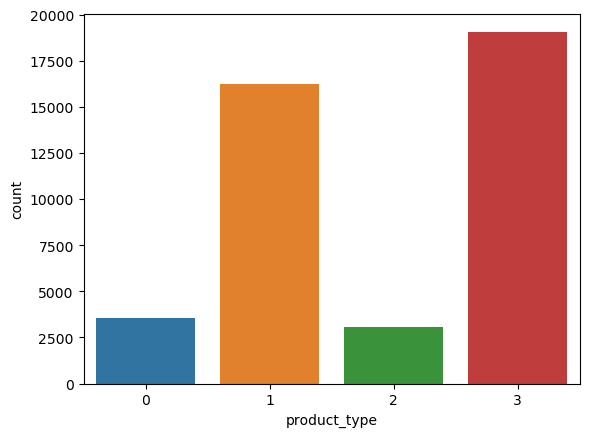

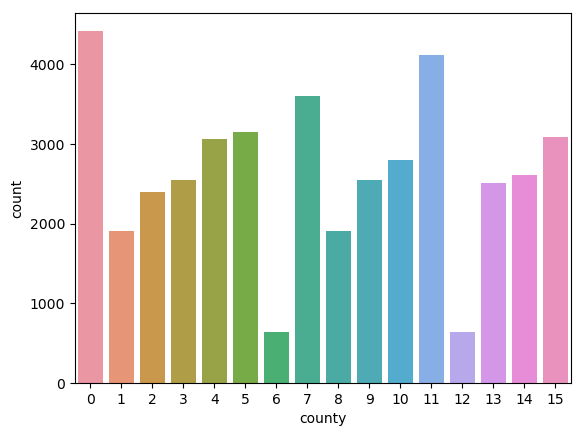

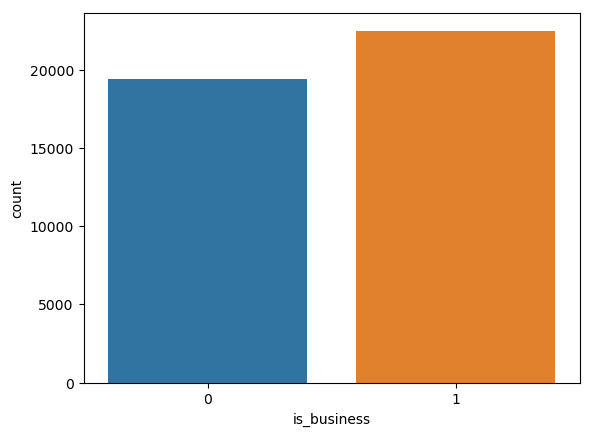

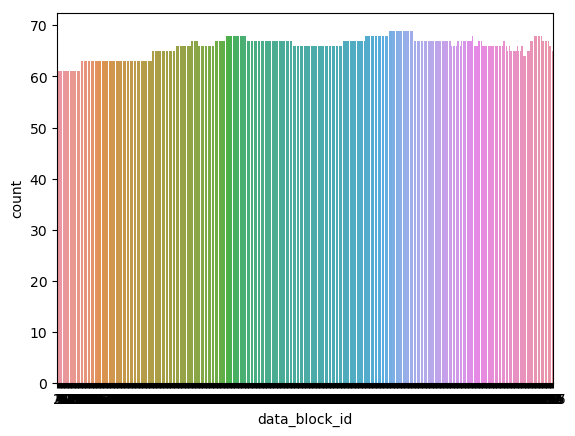

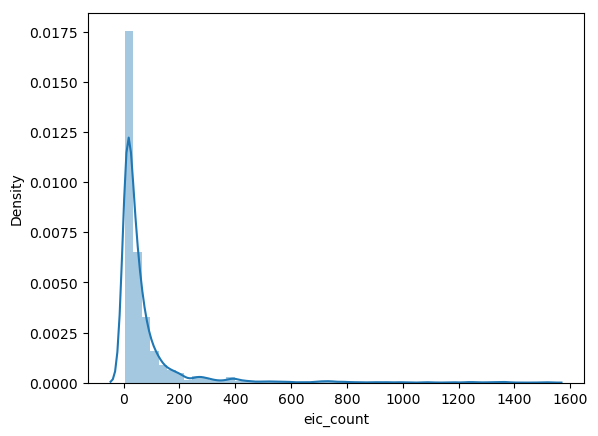

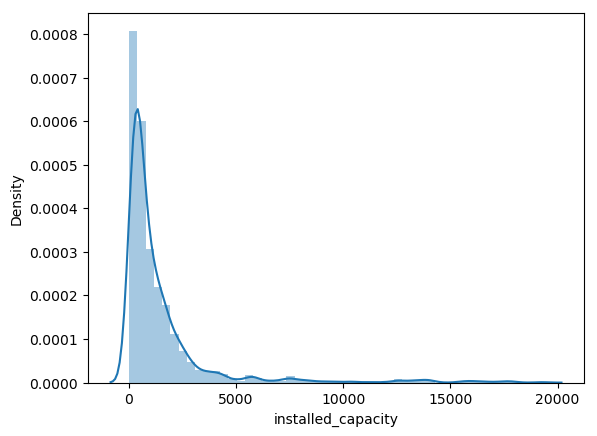

In [23]:
countcols = ['product_type', 'county', 'is_business', 'data_block_id']
distcols =  ['eic_count', 'installed_capacity']

for col in df_client[countcols]:
    sns.countplot(df_client[col])
    plt.show()
for col2 in df_client[distcols]:
    sns.distplot(df_client[col2])
    plt.show()

In [25]:
print(df_client['eic_count'].min(), df_client['eic_count'].max())
print(df_client['eic_count'].value_counts())

5 1517


### Analyze Train Data (df_train.csv)

- county - An ID code for the county.
- is_business - Boolean for whether or not the prosumer is a business.
- product_type - ID code with the following mapping of codes to contract types: {0: "Combined", 1: "Fixed", 2: "General service", 3: "Spot"}.
- TARGET - The consumption or production amount for the relevant segment for the hour. The segments are defined by the county, is_business, and product_type.
- is_consumption - Boolean for whether or not this row's target is consumption or production.
- datetime - The Estonian time in EET (UTC+2) / EEST (UTC+3). It describes the START of the 1-hour period on which target is given.
- data_block_id - All rows sharing the same data_block_id will be available at the SAME FORECAST TIME. This is a function of what information is available when forecasts are actually made, at 11 AM EACH MORNING. For example, if the forecast weather data_block_id for predictins made on October 31st is 100 then the historic weather data_block_id for October 31st will be 101 as the historic weather data is only actually available the next day.
- row_id - A unique identifier for the row.
- prediction_unit_id - A unique identifier for the county, is_business, and product_type combination. New prediction units can appear or disappear in the test set.

In [26]:
# Load data from the csv file

df_train = pd.read_csv('data/train.csv', keep_default_na=False)
# client.columns = df_train.columns.str.lower()

pd.set_option('display.max_columns', 81)
df_train.head(5)

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.59,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.0,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


In [29]:
df_train.dtypes

county                 int64
is_business            int64
product_type           int64
target                object
is_consumption         int64
datetime              object
data_block_id          int64
row_id                 int64
prediction_unit_id     int64
dtype: object

#### Convert target column to float and remove empty string values

In [38]:
value_counts = df_train['target'].value_counts()

# Check how many rows have an empty string
empty_string_count = value_counts['']

print(f"Number of rows with empty string in 'target' column: {empty_string_count}")

Number of rows with empty string in 'target' column: 528


In [40]:
# Replace empty strings with NaN
df_train['target'] = df_train['target'].replace('', np.nan).astype(float)

# Check the data types after conversion
print(df_train.dtypes)

county                  int64
is_business             int64
product_type            int64
target                float64
is_consumption          int64
datetime               object
data_block_id           int64
row_id                  int64
prediction_unit_id      int64
dtype: object


In [ ]:
value_counts = df_train['datetime'].value_counts()

# Check how many rows have an empty string
empty_string_count = value_counts['']

print(f"Number of rows with empty string in 'datetime' column: {empty_string_count}")

#### Set datetime column to datetime

In [49]:
import pandas as pd

# Assuming df_train is your DataFrame
# Replace 'datetime_column' with the actual column name if different
df_train['datetime'] = pd.to_datetime(df_train['datetime'], errors='coerce')

# Check the data types after conversion
print(df_train.dtypes)


county                         int64
is_business                    int64
product_type                   int64
target                       float64
is_consumption                 int64
datetime              datetime64[ns]
data_block_id                  int64
row_id                         int64
prediction_unit_id             int64
dtype: object


In [46]:
df_train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2


#### Statistical Plots

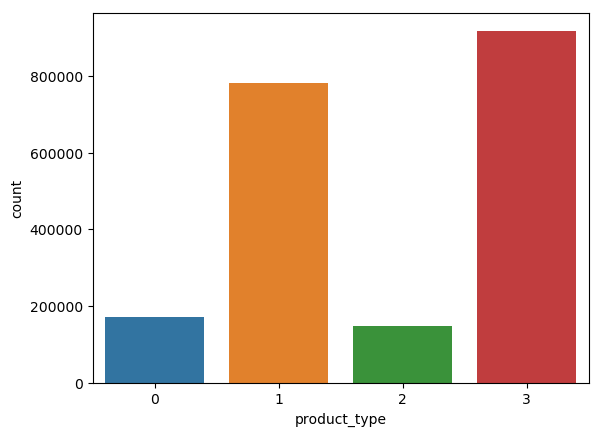

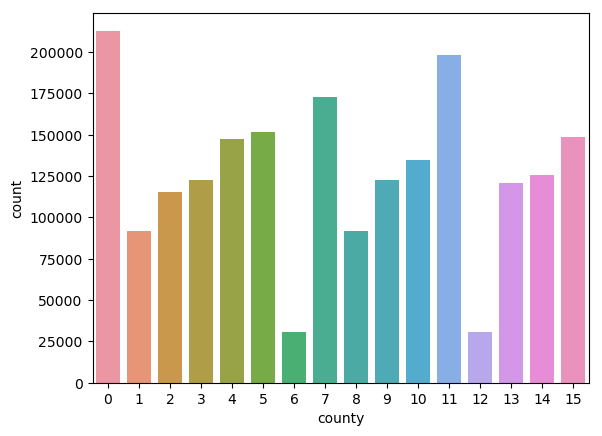

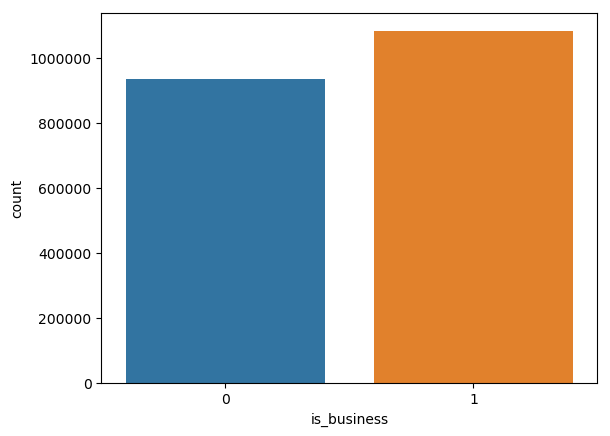

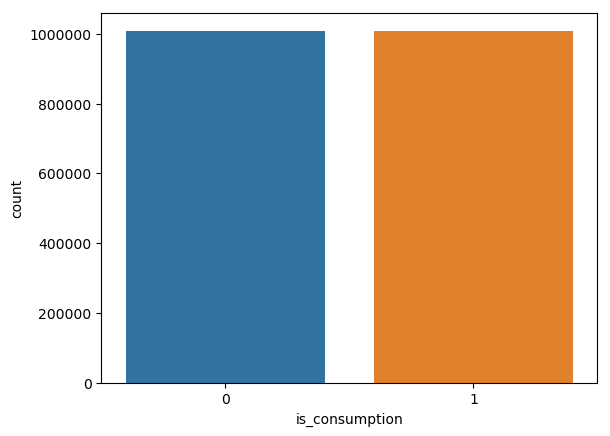

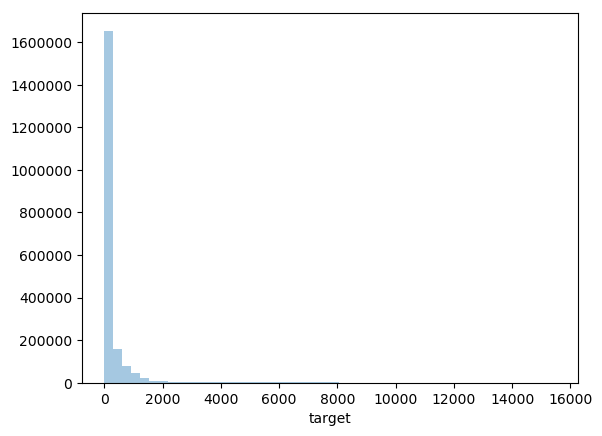

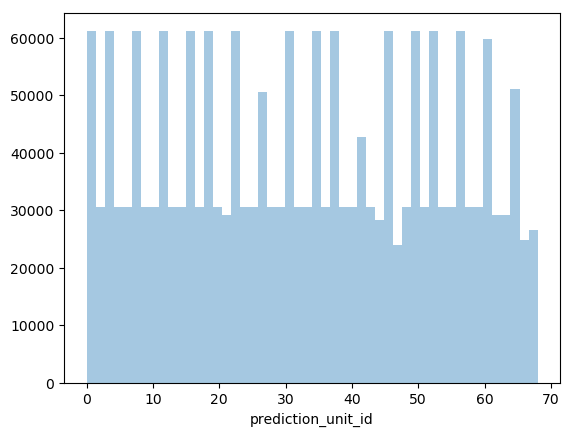

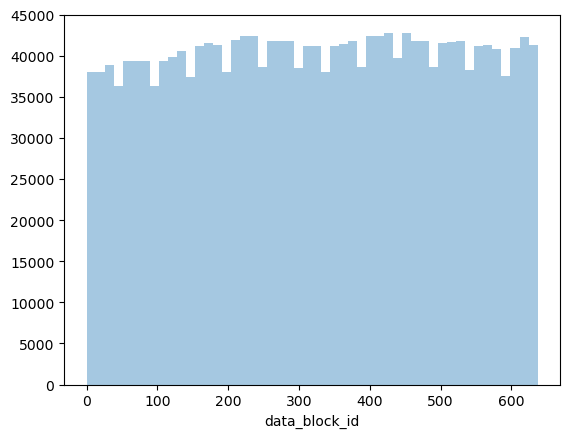

In [45]:
counttraincols = ['product_type', 'county', 'is_business','is_consumption']
disttraincols =  ['target','prediction_unit_id','data_block_id']

for col in df_train[counttraincols]:
    sns.countplot(df_train[col])
    plt.show()
for col2 in df_train[disttraincols]:
    sns.distplot(df_train[col2], kde=False, hist=True)
    plt.show()

In [34]:
for col in df_train.columns:
    print(col, df_train[col].value_counts())

county county
0     212928
11    198000
7     173088
5     151632
15    148752
4     147264
10    134640
14    125808
3     122496
9     122496
13    121056
2     115200
1      91872
8      91872
6      30624
12     30624
Name: count, dtype: int64
is_business is_business
1    1083504
0     934848
Name: count, dtype: int64
product_type product_type
3    918720
1    781632
0    170544
2    147456
Name: count, dtype: int64
target target
0.0         305637
0.0          45859
0.001         9634
0.003         5650
0.002         4747
             ...  
378.357          1
353.392          1
2847.361         1
347.106          1
197.233          1
Name: count, Length: 658150, dtype: int64
is_consumption is_consumption
0    1009176
1    1009176
Name: count, dtype: int64
datetime datetime
2022-11-27 12:00:00    138
2022-11-17 03:00:00    138
2022-11-16 14:00:00    138
2022-11-16 15:00:00    138
2022-11-16 16:00:00    138
                      ... 
2021-09-20 23:00:00    122
2021-09-20 22:00:00   

### Analyze Weather Forecast (df_forecast.csv)

In [50]:
# Load data from the csv file

df_forecast = pd.read_csv('data/forecast_weather.csv', keep_default_na=False)
# client.columns = df_train.columns.str.lower()

pd.set_option('display.max_columns', 81)
df_forecast.tail(5)

,latitude,longitude,origin_datetime,hours_ahead,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,data_block_id,forecast_datetime,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
3424507,59.7,26.2,2023-05-30 02:00:00,48,10.150049,5.662744,0.061066,0.257339,0.004059,0.308594,6.890626,-3.258144,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424508,59.7,26.7,2023-05-30 02:00:00,48,10.259790,5.922754,0.107880,0.895203,0.198700,0.906036,6.890626,-3.768032,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424509,59.7,27.2,2023-05-30 02:00:00,48,10.467798,6.072534,0.000000,0.387466,0.448853,0.530518,6.214112,-4.700405,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424510,59.7,27.7,2023-05-30 02:00:00,48,10.694116,7.009058,0.000000,0.505936,0.997314,0.997498,5.810060,-4.338345,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0
3424511,59.7,28.2,2023-05-30 02:00:00,48,11.233179,7.069238,0.703461,0.292313,0.934021,0.989716,2.719728,-0.922939,637,2023-06-01 02:00:00,0.0,0.0,0.0,0.0


In [88]:
df_forecast.columns

Index(['origin_datetime', 'forecast_datetime', 'hours_ahead', 'latitude',
       'longitude', 'data_block_id', 'temperature', 'dewpoint',
       'cloudcover_high', 'cloudcover_low', 'cloudcover_mid',
       'cloudcover_total', '10_metre_u_wind_component',
       '10_metre_v_wind_component', 'direct_solar_radiation',
       'surface_solar_radiation_downwards', 'snowfall', 'total_precipitation',
       'origin_date', 'origin_time'],
      dtype='object')

#### 1. change column order of df_forecast

In [89]:
col_order = ['origin_datetime', 'forecast_datetime',
       'origin_date', 'origin_time','hours_ahead', 'latitude', 'longitude', 'data_block_id','temperature', 'dewpoint', 'cloudcover_high', 'cloudcover_low',
       'cloudcover_mid', 'cloudcover_total', '10_metre_u_wind_component','10_metre_v_wind_component', 'direct_solar_radiation', 'surface_solar_radiation_downwards',
       'snowfall', 'total_precipitation']

df_forecast = df_forecast[col_order]
df_forecast.head()

,origin_datetime,forecast_datetime,origin_date,origin_time,hours_ahead,latitude,longitude,data_block_id,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01,02:00:00,1,57.6,21.7,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,0.0,0.0,0.0,0.0
1,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01,02:00:00,1,57.6,22.2,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,0.0,0.0,0.0,0.0
2,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01,02:00:00,1,57.6,22.7,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,0.0,0.0,0.0,0.0
3,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01,02:00:00,1,57.6,23.2,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,0.0,0.0,0.0,0.0
4,2021-09-01 02:00:00,2021-09-01 03:00:00,2021-09-01,02:00:00,1,57.6,23.7,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,0.0,0.0,0.0,0.0


#### 2. create dataframe with unique gps combinations

In [ ]:
count_per_location = df_forecast.groupby(['latitude', 'longitude']).size().reset_index(name='count')

In [ ]:
pd.set_option('display.max_rows', 112)
# Print the resulting DataFrame
print(count_per_location)

In [107]:
count_per_location.head()

,latitude,longitude,count,station,lat/long,county_code,county_name
0,57.6,21.7,30576,station1,"57.6,21.7",12,UNKNOWN
1,57.6,22.2,30576,station2,"57.6,22.2",12,UNKNOWN
2,57.6,22.7,30576,station3,"57.6,22.7",12,UNKNOWN
3,57.6,23.2,30576,station4,"57.6,23.2",10,SAAREMAA
4,57.6,23.7,30576,station5,"57.6,23.7",12,UNKNOWN


#### 3. Map 112 weather stations (lat/long) to region

In [98]:
count_per_location['lat/long'] = count_per_location['latitude'].astype(str) + ',' + count_per_location['longitude'].astype(str)

In [100]:
print(countyname)

{'0': 'HARJUMAA', '1': 'HIIUMAA', '2': 'IDA-VIRUMAA', '3': 'JÄRVAMAA', '4': 'JÕGEVAMAA', '5': 'LÄÄNE-VIRUMAA', '6': 'LÄÄNEMAA', '7': 'PÄRNUMAA', '8': 'PÕLVAMAA', '9': 'RAPLAMAA', '10': 'SAAREMAA', '11': 'TARTUMAA', '12': 'UNKNOWN', '13': 'VALGAMAA', '14': 'VILJANDIMAA', '15': 'VÕRUMAA'}


In [101]:
station_dict = {'station1':'12','station2':'12','station3':'12','station4':'10','station5':'12','station6':'12','station7':'12','station8':'12','station9':'12','station10':'12','station11':'15','station12':'15','station13':'12','station14':'12','station15':'10','station16':'10','station17':'12','station18':'10','station19':'7','station20':'7','station21':'12','station22':'12','station23':'13','station24':'13','station25':'15','station26':'15','station27':'8','station28':'12','station29':'10','station30':'10','station31':'10','station32':'10','station33':'7','station34':'7','station35':'7','station36':'7','station37':'14','station38':'11','station39':'11','station40':'8','station41':'12','station42':'12','station43':'10','station44':'10','station45':'10','station46':'10','station47':'7','station48':'7','station49':'7','station50':'14','station51':'14','station52':'4','station53':'11','station54':'11','station55':'12','station56':'12','station57':'1','station58':'1','station59':'1','station60':'1','station61':'6','station62':'9','station63':'9','station64':'9','station65':'3','station66':'4','station67':'4','station68':'4','station69':'12',
'station70':'12','station71':'12','station72':'1','station73':'1','station74':'6','station75':'6','station76':'0','station77':'9','station78':'0','station79':'3','station80':'5','station81':'5','station82':'2','station83':'2','station84':'12','station85':'12','station86':'12','station87':'12','station88':'6','station89':'0','station90':'0','station91':'0','station92':'0','station93':'0','station94':'5','station95':'5','station96':'2','station97':'2','station98':'12','station99':'12','station100':'12','station101':'12','station102':'12','station103':'12','station104':'12','station105':'0','station106':'0','station107':'0','station108':'5','station109':'5','station110':'12','station111':'12','station112':'12'}

In [102]:
count_per_location['county_code'] = count_per_location['station'].map(station_dict)

In [104]:
count_per_location['county_name'] = count_per_location['county_code'].map(countyname)

In [108]:
count_per_location.head()

,latitude,longitude,count,station,lat/long,county_code,county_name
0,57.6,21.7,30576,station1,"57.6,21.7",12,UNKNOWN
1,57.6,22.2,30576,station2,"57.6,22.2",12,UNKNOWN
2,57.6,22.7,30576,station3,"57.6,22.7",12,UNKNOWN
3,57.6,23.2,30576,station4,"57.6,23.2",10,SAAREMAA
4,57.6,23.7,30576,station5,"57.6,23.7",12,UNKNOWN


In [54]:
# Convert 'latitude' and 'longitude' columns into tuples
gps_locations = list(zip(count_per_location['latitude'], count_per_location['longitude']))

# Add a new column 'station' to count_per_location with station names
count_per_location['station'] = ['station{}'.format(i + 1) for i in range(len(count_per_location))]

In [61]:
df_forecast.head()

,origin_datetime,forecast_datetime,hours_ahead,latitude,longitude,data_block_id,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,2021-09-01 02:00:00,2021-09-01 03:00:00,1,57.6,21.7,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,0.0,0.0,0.0,0.0
1,2021-09-01 02:00:00,2021-09-01 03:00:00,1,57.6,22.2,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,0.0,0.0,0.0,0.0
2,2021-09-01 02:00:00,2021-09-01 03:00:00,1,57.6,22.7,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,0.0,0.0,0.0,0.0
3,2021-09-01 02:00:00,2021-09-01 03:00:00,1,57.6,23.2,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,0.0,0.0,0.0,0.0
4,2021-09-01 02:00:00,2021-09-01 03:00:00,1,57.6,23.7,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,0.0,0.0,0.0,0.0


In [58]:
df_forecast.dtypes

origin_datetime                       object
forecast_datetime                     object
hours_ahead                            int64
latitude                             float64
longitude                            float64
data_block_id                          int64
temperature                          float64
dewpoint                             float64
cloudcover_high                      float64
cloudcover_low                       float64
cloudcover_mid                       float64
cloudcover_total                     float64
10_metre_u_wind_component            float64
10_metre_v_wind_component            float64
direct_solar_radiation               float64
surface_solar_radiation_downwards     object
snowfall                             float64
total_precipitation                  float64
dtype: object

#### 4. Fix empty values in ['surface_solar_radiation_downwards']

In [59]:
value_counts = df_forecast['surface_solar_radiation_downwards'].value_counts()

# Check how many rows have an empty string
empty_string_count = value_counts['']

print(f"Number of rows with empty string in 'surface_solar_radiation_downwards' column: {empty_string_count}")

Number of rows with empty string in 'surface_solar_radiation_downwards' column: 2


In [60]:
# Replace empty strings with NaN
df_forecast['surface_solar_radiation_downwards'] = df_forecast['surface_solar_radiation_downwards'].replace('', np.nan).astype(float)

# Check the data types after conversion
print(df_forecast.dtypes)

origin_datetime                       object
forecast_datetime                     object
hours_ahead                            int64
latitude                             float64
longitude                            float64
data_block_id                          int64
temperature                          float64
dewpoint                             float64
cloudcover_high                      float64
cloudcover_low                       float64
cloudcover_mid                       float64
cloudcover_total                     float64
10_metre_u_wind_component            float64
10_metre_v_wind_component            float64
direct_solar_radiation               float64
surface_solar_radiation_downwards    float64
snowfall                             float64
total_precipitation                  float64
dtype: object


5. Add dates to Weather Forecast

In [63]:
df_forecast['origin_datetime'] = pd.to_datetime(df_forecast['origin_datetime'], errors='coerce')
df_forecast['forecast_datetime'] = pd.to_datetime(df_forecast['forecast_datetime'], errors='coerce')

origin_datetime                      datetime64[ns]
forecast_datetime                    datetime64[ns]
hours_ahead                                   int64
latitude                                    float64
longitude                                   float64
data_block_id                                 int64
temperature                                 float64
dewpoint                                    float64
cloudcover_high                             float64
cloudcover_low                              float64
cloudcover_mid                              float64
cloudcover_total                            float64
10_metre_u_wind_component                   float64
10_metre_v_wind_component                   float64
direct_solar_radiation                      float64
surface_solar_radiation_downwards           float64
snowfall                                    float64
total_precipitation                         float64
dtype: object


In [66]:
print (df_forecast['origin_datetime'].min(), df_forecast['origin_datetime'].max())

2021-09-01 02:00:00 2023-05-30 02:00:00


In [86]:
# Create new columns
df_forecast['origin_date'] = df_forecast['origin_datetime'].dt.date
df_forecast['origin_time'] = df_forecast['origin_datetime'].dt.time

In [ ]:
# Create new columns
df_forecast['forecast_datetime'] = df_forecast['forecast_datetime'].dt.date
df_forecast['forecast_datetime'] = df_forecast['forecast_datetime'].dt.time

In [92]:
df_forecast['forecast_datetime'] = pd.to_datetime(df_forecast['forecast_datetime'], errors='coerce')

In [94]:
df_forecast.head()

,origin_datetime,forecast_datetime,origin_date,origin_time,hours_ahead,latitude,longitude,data_block_id,temperature,dewpoint,cloudcover_high,cloudcover_low,cloudcover_mid,cloudcover_total,10_metre_u_wind_component,10_metre_v_wind_component,direct_solar_radiation,surface_solar_radiation_downwards,snowfall,total_precipitation
0,2021-09-01 02:00:00,2021-09-01,2021-09-01,02:00:00,1,57.6,21.7,1,15.655786,11.553613,0.904816,0.019714,0.000000,0.905899,-0.411328,-9.106137,0.0,0.0,0.0,0.0
1,2021-09-01 02:00:00,2021-09-01,2021-09-01,02:00:00,1,57.6,22.2,1,13.003931,10.689844,0.886322,0.004456,0.000000,0.886658,0.206347,-5.355405,0.0,0.0,0.0,0.0
2,2021-09-01 02:00:00,2021-09-01,2021-09-01,02:00:00,1,57.6,22.7,1,14.206567,11.671777,0.729034,0.005615,0.000000,0.730499,1.451587,-7.417905,0.0,0.0,0.0,0.0
3,2021-09-01 02:00:00,2021-09-01,2021-09-01,02:00:00,1,57.6,23.2,1,14.844507,12.264917,0.336304,0.074341,0.000626,0.385468,1.090869,-9.163999,0.0,0.0,0.0,0.0
4,2021-09-01 02:00:00,2021-09-01,2021-09-01,02:00:00,1,57.6,23.7,1,15.293848,12.458887,0.102875,0.088074,0.000015,0.176590,1.268481,-8.975766,0.0,0.0,0.0,0.0


### Analyze Historical Weather (df_history.csv)

In [160]:
# Load data from the csv file

df_hist = pd.read_csv('data/historical_weather.csv', keep_default_na=False)
# client.columns = df_train.columns.str.lower()

pd.set_option('display.max_columns', 18)
df_hist.head(5)

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,cloudcover_high,windspeed_10m,winddirection_10m,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id
0,2021-09-01 00:00:00,14.2,11.6,0.0,0.0,1015.9,31,31,0,11,7.083333,8,0.0,0.0,0.0,57.6,21.7,1.0
1,2021-09-01 00:00:00,13.9,11.5,0.0,0.0,1010.7,33,37,0,0,5.111111,359,0.0,0.0,0.0,57.6,22.2,1.0
2,2021-09-01 00:00:00,14.0,12.5,0.0,0.0,1015.0,31,34,0,0,6.333333,355,0.0,0.0,0.0,57.6,22.7,1.0
3,2021-09-01 00:00:00,14.6,11.5,0.0,0.0,1017.3,0,0,0,0,8.083333,297,358.0,277.0,81.0,57.6,23.2,1.0
4,2021-09-01 00:00:00,15.7,12.9,0.0,0.0,1014.0,22,25,0,0,8.416667,5,0.0,0.0,0.0,57.6,23.7,1.0


In [149]:
df_hist.shape

(1710802, 18)

In [113]:
print(df_hist.datetime.min(), df_hist.datetime.max())

2021-09-01 00:00:00 2023-05-30 10:00:00


In [162]:
df_hist.dtypes

datetime                   object
temperature               float64
dewpoint                  float64
rain                      float64
snowfall                  float64
surface_pressure          float64
cloudcover_total            int64
cloudcover_low              int64
cloudcover_mid              int64
cloudcover_high             int64
windspeed_10m             float64
winddirection_10m           int64
shortwave_radiation       float64
direct_solar_radiation    float64
diffuse_radiation         float64
latitude                  float64
longitude                 float64
data_block_id             float64
datetime_copy              object
dtype: object

In [161]:
df_hist['datetime_copy'] = df_hist['datetime'].copy()

In [163]:
# Create new columns
df_hist['datetime'] = pd.to_datetime(df_hist['datetime'], errors='coerce')
df_hist['datetime_date'] = df_hist['datetime'].dt.date
df_hist['datetime_time'] = df_hist['datetime'].dt.time


In [164]:
df_hist['datetime_time'] = pd.to_datetime(df_hist['datetime_time'], format='%H:%M:%S').dt.hour


In [165]:
df_hist.head()

,datetime,temperature,dewpoint,rain,snowfall,surface_pressure,cloudcover_total,cloudcover_low,cloudcover_mid,...,shortwave_radiation,direct_solar_radiation,diffuse_radiation,latitude,longitude,data_block_id,datetime_copy,datetime_date,datetime_time
0,2021-09-01,14.2,11.6,0.0,0.0,1015.9,31,31,0,...,0.0,0.0,0.0,57.6,21.7,1.0,2021-09-01 00:00:00,2021-09-01,0
1,2021-09-01,13.9,11.5,0.0,0.0,1010.7,33,37,0,...,0.0,0.0,0.0,57.6,22.2,1.0,2021-09-01 00:00:00,2021-09-01,0
2,2021-09-01,14.0,12.5,0.0,0.0,1015.0,31,34,0,...,0.0,0.0,0.0,57.6,22.7,1.0,2021-09-01 00:00:00,2021-09-01,0
3,2021-09-01,14.6,11.5,0.0,0.0,1017.3,0,0,0,...,358.0,277.0,81.0,57.6,23.2,1.0,2021-09-01 00:00:00,2021-09-01,0
4,2021-09-01,15.7,12.9,0.0,0.0,1014.0,22,25,0,...,0.0,0.0,0.0,57.6,23.7,1.0,2021-09-01 00:00:00,2021-09-01,0


In [166]:
df_hist.dtypes

datetime                  datetime64[ns]
temperature                      float64
dewpoint                         float64
rain                             float64
snowfall                         float64
surface_pressure                 float64
cloudcover_total                   int64
cloudcover_low                     int64
cloudcover_mid                     int64
cloudcover_high                    int64
windspeed_10m                    float64
winddirection_10m                  int64
shortwave_radiation              float64
direct_solar_radiation           float64
diffuse_radiation                float64
latitude                         float64
longitude                        float64
data_block_id                    float64
datetime_copy                     object
datetime_date                     object
datetime_time                      int64
dtype: object

#### Conduct some logical tests

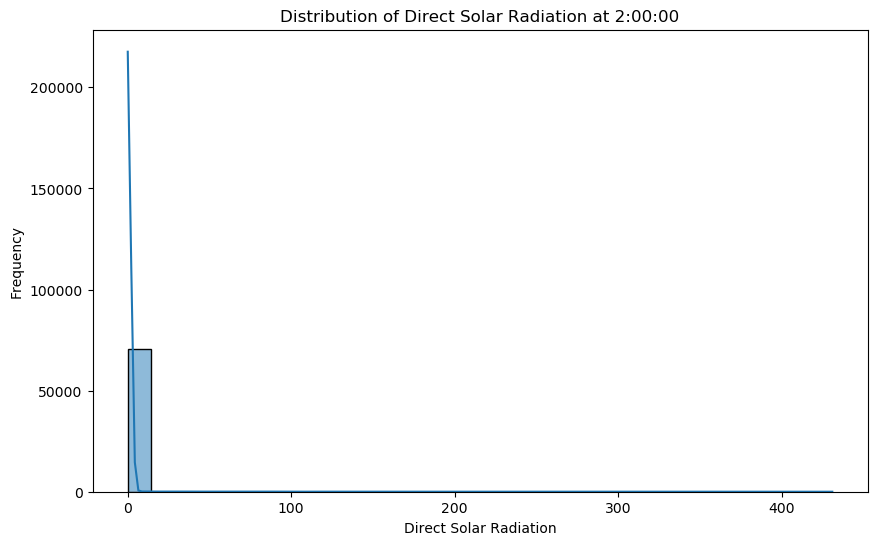

In [169]:
# Filter data for the specific time
subset_data = df_hist.query('datetime_time == 2')

# Plot histogram using seaborn
plt.figure(figsize=(10, 6))
sns.histplot(subset_data['direct_solar_radiation'], bins=30, kde=True)
plt.title('Distribution of Direct Solar Radiation at 2:00:00')
plt.xlabel('Direct Solar Radiation')
plt.ylabel('Frequency')
plt.show()

In [180]:
df_hist.query('datetime_time == 3')['diffuse_radiation'].value_counts()

0.0      70373
65.0        21
66.0        15
16.0        14
71.0        14
         ...  
245.0        1
226.0        1
237.0        1
129.0        1
157.0        1
Name: diffuse_radiation, Length: 181, dtype: int64